In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 

In [23]:
df=pd.read_csv("diabetes.csv")
df.copy()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
rf_model=RandomForestClassifier().fit(X_train,y_train)

In [27]:
rf_model

RandomForestClassifier()

In [28]:
y_pred=rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7402597402597403

In [29]:
#model turing

In [30]:
rf=RandomForestClassifier()

In [31]:
rf_params={"n_estimators":[100,200,300,1000],"max_features":[3,5,7,8],"min_samples_split":[2,5,8,10,20]}

In [32]:
rf_cv_model=GridSearchCV(rf,rf_params,n_jobs=-1,cv=5,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [33]:
rf_cv_model.best_params_

{'max_features': 5, 'min_samples_split': 5, 'n_estimators': 300}

In [34]:
#final
rf_tuned=RandomForestClassifier(n_estimators=1000,max_features=5,min_samples_split=8).fit(X_train,y_train)

In [35]:
y_pred=rf_tuned.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.7532467532467533

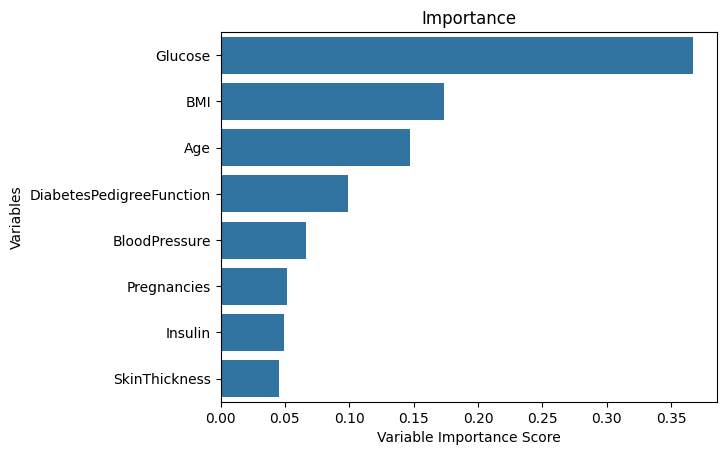

In [37]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                         index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Variable Importance Score')
plt.ylabel('Variables')
plt.title("Importance")
plt.show()